# Projeto 1 - Ciência dos Dados

Nome: Roberto Schnorrenberg

## Pergunta (s) a ser respondida

Os países que se integraram ao OCDE (Organização para Cooperação e Desenvolvimento Econômico) aumentaram o número de bilionários e dimínuiram o número de suicídios em suas províncias relacionados aos países de fora do bloco?

## Explicação da hipótese e mecanismo

Atualmente a OCDE é uma organização internacional com o objetivo de fomentar e incentivar ações de desenvolvimento econômico de seus países, além de medidas que visem à ampliação de metas para o equilíbrio econômico mundial e melhorem as condições de vida e os índices de renda e emprego.

Portanto, com a diminuição do desemprego e a melhora das condições de vida em geral há uma hipótese de que o número de bilionários aumente e o número de suicídos diminua nos países participantes do bloco.

Diante disso, os dados de renda nacional líquida per capita e o índice de desemprego serão observados para propor uma correlação ao número de bilionários e suicídios de países de dentro e fora do bloco no ano de 2005, explicitando, se houver, alguma diferença entre os dados dos integrantes e não integrantes da organização internacional. Já que é comum imaginar que um país com  melhores condições de vida e um pequeno índice de desemprego acaba gerando uma diminuição no número de suicídios ou no aumento de bilionários do país. Logo, esse projeto tem como função esclarecer a relação desses dados.

Como referência para transpor tal hipótese segue o estudo do site: https://www.bbc.com/portuguese/geral-48890430(https://www.insper.edu.br/biblioteca-telles/recursos-de-busca/)

## Bases de dados usadas

link para o site de download das bases de dados = https://www.gapminder.org/data/ 

Foram coletados os seguintes dados:

- Renda nacional líquida ajustada per capita
- Ìndice de desemprego de indivíduos entre 25 a 54 anos
- Número de bilionários
- Número de suicídios



## Análise de dados

Insira abaixo uma análise de dados tratada para ter maior clareza. 

Lembre-se de que, além deste arquivo principal, você precisa entregar um ou mais *notebooks* mais brutos com todas as tentativas que fez e que não deram certo .

**Não inclua dados ou gráficos sem motivação nem interpretação** - sempre que fizer uma análise, plot ou tablea, diga qual sua intenção. Logo após a apresentação diga qual conclusão específica ou interpretação você tira daquela análise

# Arquivos e índices necessários

In [32]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
renda=pd.read_excel('renda_certa.xlsx')
desemprego=pd.read_excel('aged_15plus_unemployment_rate_percent.xlsx')
bilionarios=pd.read_excel('dollar_billionaires.xlsx')
suicidios=pd.read_excel('suicide_total_deaths.xlsx')

# Renda

Os dados em questão representam a renda dos países em 2005.

In [34]:
renda_2005 = renda.loc[:, ["country", 2005]]
renda_2005.head()

,country,2005
0,Afghanistan,NaN
1,Albania,2500.0
2,Algeria,2060.0
3,Angola,564.0
4,Argentina,3790.0


# Desemprego

Os dados em questão representam a taxa de desemprego dos países em 2005.

In [35]:
desemprego_2005 = desemprego.loc[:,['country', 2005]]
desemprego_2005.head()

,country,2005
0,Afghanistan,NaN
1,Albania,NaN
2,Algeria,15.3
3,Angola,NaN
4,Antigua and Barbuda,NaN


# Bilionários 

Os dados em questão representam o número de bilionários dos países em 2005.

In [36]:
bilionarios_2005 = bilionarios.loc[:,['country', 2005]] 
bilionarios_2005.head()

,country,2005
0,Afghanistan,0.0
1,Albania,0.0
2,Algeria,0.0
3,Andorra,0.0
4,Angola,0.0


# Suicídios

Os dados em questão representam o número de suicídios dos países em 2005.

In [37]:
suicidios_2005 = suicidios.loc[:,['country', 2005]]
suicidios_2005.head()

,country,2005
0,Afghanistan,1600.00
1,Albania,204.00
2,Algeria,1210.00
3,Andorra,7.04
4,Angola,980.00


# Join

Unindo os quatro dados coletados em uma unica tabela.

In [38]:
renda_idx = renda_2005.set_index('country')

In [39]:
desemprego_idx = desemprego_2005.set_index('country')

In [40]:
bilionarios_idx = bilionarios_2005.set_index('country')

In [41]:
suicidios_idx = suicidios_2005.set_index('country')

In [42]:
renda_desemprego = renda_idx.join(desemprego_idx, how='inner', lsuffix='_renda', rsuffix='_dspg')
renda_desemprego.head()

,2005_renda,2005_dspg
country,,
Afghanistan,NaN,NaN
Albania,2500.0,NaN
Algeria,2060.0,15.3
Angola,564.0,NaN
Argentina,3790.0,11.5


In [43]:
bili_sui = bilionarios_idx.join(suicidios_idx, how='inner', lsuffix='_bln', rsuffix='_scd')
bili_sui.head()

,2005_bln,2005_scd
country,,
Afghanistan,0.0,1600.00
Albania,0.0,204.00
Algeria,0.0,1210.00
Andorra,0.0,7.04
Angola,0.0,980.00


In [44]:
tab = renda_desemprego.join(bili_sui, how='inner')
tab.head()

,2005_renda,2005_dspg,2005_bln,2005_scd
country,,,,
Afghanistan,NaN,NaN,0.0000,1600.0
Albania,2500.0,NaN,0.0000,204.0
Algeria,2060.0,15.3,0.0000,1210.0
Angola,564.0,NaN,0.0000,980.0
Argentina,3790.0,11.5,0.0253,4470.0


In [45]:
tab['OCDE']='excluso'
lista_OCDE=['Germany','Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'South Korea', 'Denmark', 'Slovenia', 'Spain', 'United States', 'Estonia', 'Finland', 'France', 'Greece', 'Hungary', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Luxembourg', 'Mexico', 'Norway', 'New Zealand', 'Netherlands', 'Peru', 'Poland', 'Portugal', 'United Kingdom']
tab.loc[lista_OCDE, 'OCDE']='incluso'
tab.head()

,2005_renda,2005_dspg,2005_bln,2005_scd,OCDE
country,,,,,
Afghanistan,NaN,NaN,0.0000,1600.0,excluso
Albania,2500.0,NaN,0.0000,204.0,excluso
Algeria,2060.0,15.3,0.0000,1210.0,excluso
Angola,564.0,NaN,0.0000,980.0,excluso
Argentina,3790.0,11.5,0.0253,4470.0,excluso


# Análise dos dados 

Para a confecção da análise dos dados é necessária a ealização de histogramas.

# Análise da renda

Aqui se encontra o histograma e o boxplot da renda no ano de 2005

Text(0.5, 0, 'Renda')

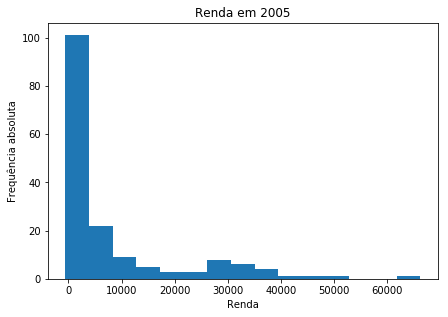

In [46]:
fig = plt.figure(figsize=(7,16))
plt.subplot(311)
plot = tab['2005_renda'].plot.hist(bins=15, title='Renda em 2005', alpha=1)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda')

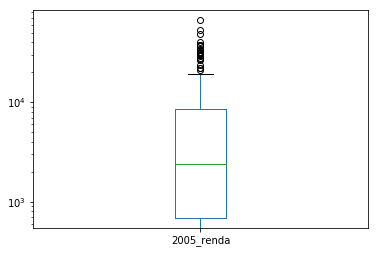

In [47]:
tab.loc[:,'2005_renda'].plot.box(logy=True)

# Análise do desemprego

Aqui se encontra o histograma e o boxplot do desemprego no ano de 2005

Text(0.5, 0, 'Desemprego')

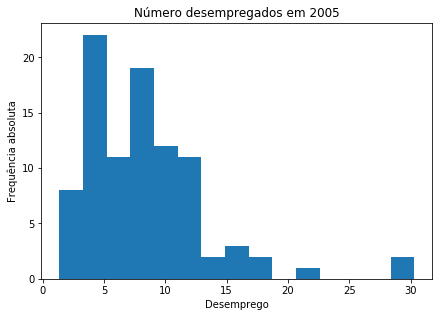

In [48]:
fig = plt.figure(figsize=(7,16))
plt.subplot(311)
plot = tab['2005_dspg'].plot.hist(bins=15, title='Número desempregados em 2005', alpha=1)
plt.ylabel('Frequência absoluta')
plt.xlabel('Desemprego')

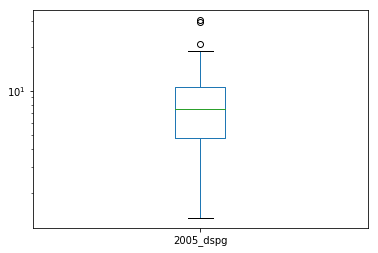

In [49]:
tab.loc[:,'2005_dspg'].plot.box(logy=True)

# Análise dos bilionários

Aqui se encontra o histograma e o boxplot dos bilionários no ano de 2005

Text(0.5, 0, 'Bilionários')

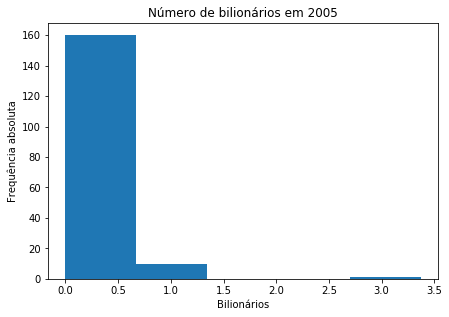

In [50]:
fig = plt.figure(figsize=(7,16))
plt.subplot(311)
plot = tab['2005_bln'].plot.hist(bins=5, title='Número de bilionários em 2005', alpha=1)
plt.ylabel('Frequência absoluta')
plt.xlabel('Bilionários')

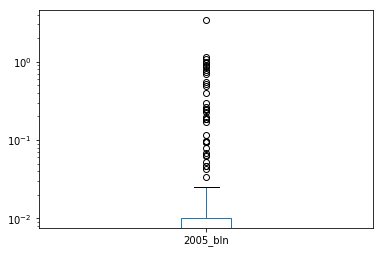

In [51]:
tab.loc[:,'2005_bln'].plot.box(logy=True)

# Análise de suicídios

Aqui se encontra o histograma e o boxplot do número de suicídios no ano de 2005

Text(0.5, 0, 'Suicídios')

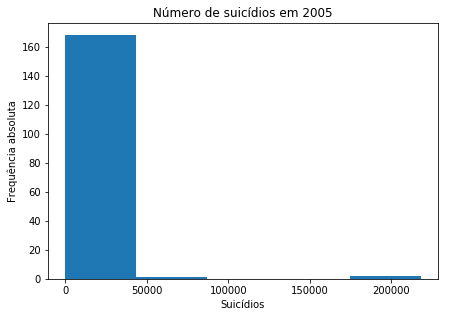

In [52]:

fig = plt.figure(figsize=(7,16))
plt.subplot(311)
plot = tab['2005_scd'].plot.hist(bins=5, title='Número de suicídios em 2005', alpha=1)
plt.ylabel('Frequência absoluta')
plt.xlabel('Suicídios')

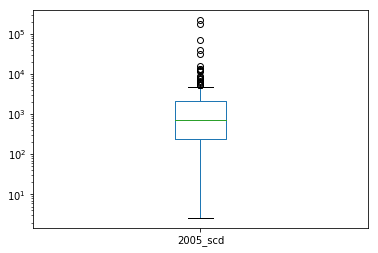

In [53]:
tab.loc[:,'2005_scd'].plot.box(logy=True)

# PARÂMETROS

Estipulação de parametros para a melhor visualização dos gráficos realizados.

In [54]:

def parametros(tab_x,tab_y,nx='eixo x',ny= 'eixo y'):    
    t=tab_y.cov(tab_x)/ tab_x.var()
    k=tab_y.mean() -t*tab_x.mean()


    f = plt.figure(figsize=(7, 5))
    plt.scatter(tab_x, tab_y, c='red', alpha=1)
    plt.title(nx + ' versus '+ ny)
    plt.xlabel(nx)
    plt.ylabel(ny)

    plt.plot((tab_x.min(), tabx.max()), (t*tab_x.min()+k, t*tab_x.max()+k), color='red')

    plt.tight_layout()
    plt.show()

# Correlação entre a renda e os bilionários

C:\Users\Roberto\.anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Correlacionando a renda em 2005 e o número de bilionários em 2005 temos: 0.6990251329296182


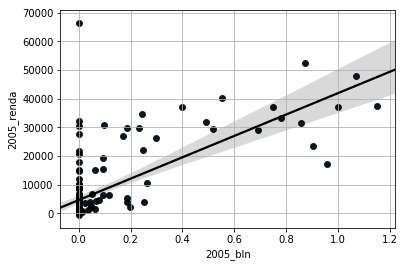

In [55]:
tab.plot.scatter(x='2005_bln',y='2005_renda');
sns.regplot(tab["2005_bln"],tab["2005_renda"], color=('black'))

plt.grid()
print('Correlacionando a renda em 2005 e o número de bilionários em 2005 temos:', tab['2005_renda'].corr(tab['2005_bln']))

**conclusão sobre o gráfico:** 

Observando o gráfico da correlação da renda e do número de bilonários no ano de 2005 é possível observar que a hipótese defendida sobre o aumento do número de bilionários de um país decorrente de uma renda alta no própio país é coerente, já que a correlação observada é alta e positiva (0.6990251329296182), explicitando que um país com uma renda alta tende a possuir um maior númeoro de bilionários.

# Correlação entre a renda e os suicídios

Correlacionando a renda em 2005 e o número de suicídios em 2005 temos: -0.02064468874622713


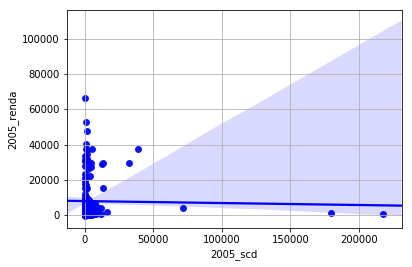

In [56]:
tab.plot.scatter(x='2005_scd',y='2005_renda');
sns.regplot(tab["2005_scd"],tab["2005_renda"], color=('blue'))

plt.grid()
print('Correlacionando a renda em 2005 e o número de suicídios em 2005 temos:', tab['2005_renda'].corr(tab['2005_scd']))

**conclusão sobre o gráfico**



# Correlação entre o desemprego e os bilionários

Correlacionando a taxa de desemprego em 2005 e o número de bilionários em 2005 temos: -0.20024259579758483


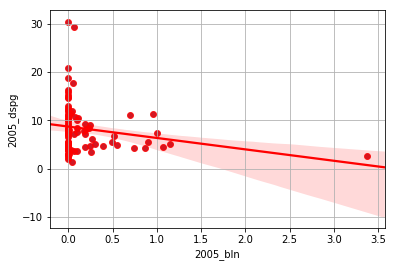

In [57]:
tab.plot.scatter(x='2005_bln',y='2005_dspg');
sns.regplot(tab["2005_bln"],tab["2005_dspg"], color=('red'))

plt.grid()
print('Correlacionando a taxa de desemprego em 2005 e o número de bilionários em 2005 temos:', tab['2005_dspg'].corr(tab['2005_bln']))

# Correlação entre o desemprego e os suicídios

Correlacionando a taxa de desemprego em 2005 e o número de bilionários em 2005 temos: -0.15576692485057295


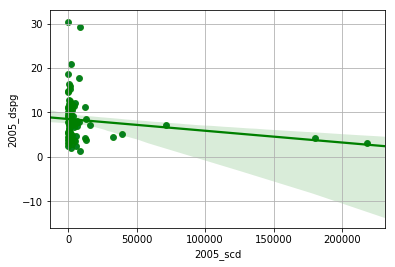

In [58]:
tab.plot.scatter(x='2005_scd',y='2005_dspg');
sns.regplot(tab["2005_scd"],tab["2005_dspg"], color=('green'))

plt.grid()
print('Correlacionando a taxa de desemprego em 2005 e o número de bilionários em 2005 temos:', tab['2005_dspg'].corr(tab['2005_scd']))

In [59]:
tab.OCDE.value_counts()

excluso    140
incluso     31
Name: OCDE, dtype: int64

In [60]:
f = range(-600,68000,10000)
renda_cat = pd.cut(tab['2005_renda'], bins=f)
renda_cat.value_counts(sort=False, normalize=True)*100

(-600, 9400]      78.048780
(9400, 19400]      6.707317
(19400, 29400]     4.878049
(29400, 39400]     8.536585
(39400, 49400]     1.219512
(49400, 59400]     0.609756
Name: 2005_renda, dtype: float64

In [61]:
renda_cat= tab['2005_renda'].cat.categories('country')

AttributeError: Can only use .cat accessor with a 'category' dtype

## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados